# ECE-5424 / CS-5824 Advanced Machine Learning
# Assignment 2
In this homework, you will be using support vector machines (SVMs) to build a spam classifier. 
We will use the following packages/libraries:
- [`numpy`](http://www.numpy.org/)
- [`scipy`](https://docs.scipy.org/doc/scipy/reference/)
- [`matplotlib`](https://matplotlib.org/)
- [`scikit-learn`](https://scikit-learn.org/)


To install them, you can use the following command in your `virtual environment`:
- `pip install scipy`
- `pip install scikit-learn`

**You need to complete the following three sections**:
1. Linear SVM
2. Kernel SVM
3. Spam classifier.

All the materials here in the homework are modified from [Stanford CS229](http://cs229.stanford.edu/) and [Andrew Ng's Machine Learning course on Coursera](https://www.coursera.org/learn/machine-learning)


## Submission guideline

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your Virginia Tech PID below.
3. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of ll cells).
4. Select Cell -> Run All. This will run all the cells in order.
5. Once you've rerun everything, select File -> Download as -> PDF via LaTeX
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. 
7. Zip BOTH the PDF file and this notebook. Rem
8. Submit your zipped file .

### Please Write Your VT PID Here: rifatsm
Your student ID here. 906114270

In [2]:
# Import all the required modules here.
import os

import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.io import loadmat
import utils
from sklearn.exceptions import ConvergenceWarning
import warnings

# We ignore the convergence warnings in this homework, as some of the exercise will
# always trigger this warning.
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Enable auto reload
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Section 1. Linear SVM [30 pts]

In the first half of this exercise, you will be using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs. In the next half of the exercise, you will be using support
vector machines to build a spam classifier.

### 1.1 Example Dataset 1 

We will begin by with a 2D example dataset which can be separated by a linear boundary. The following cell plots the training data, which should look like this:

![Dataset 1 training data](Figures/dataset1.png)

In this dataset, the positions of the positive examples (indicated with `x`) and the negative examples (indicated with `o`) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example `x` on the far left at about (0.1, 4.1). 

In this part of the exercise, you will try using different values of the $C$ parameter with SVMs. Informally, the $C$ parameter is a positive value that controls the penalty for misclassified training examples. A large $C$ parameter tells the SVM to try to classify all the examples correctly. $C$ plays a role similar to $1/\lambda$, where $\lambda$ is the regularization parameter that we were using previously for logistic regression.


We show the example of using $C=1$ and $C=100$ for Linear SVMs below:
<table style="text-align:center">
    <tr>
        <th colspan="2" style="text-align:center">SVM Decision boundary for example dataset 1 </th>
    </tr>
    <tr>
        <td style="text-align:center">C=1<img src="Figures/svm_c1.png"/></td>
        <td style="text-align:center">C=100<img src="Figures/svm_c100.png"/></td>
    </tr>
</table>


Your task here is to train Linear SVM classifier with [`LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) from `scikit-learn`.

Specifically, you need to traing with `hinge_loss` and `l2` penalty, **try 5 different $C$**, and plot them out.

**Hint:** check the class [`LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) (click it!) the function `fit` and `predict`, as well as relevant descriptions about **Parameters/Attributes**. Also, some of the arguments have its own default value (For example, the default $C$ for `LinearSVC` is 1.0). You can find all these information in the document.

<br/>
<div class="alert alert-block alert-warning">
**Implementation Note:** In this assignment, you DO NOT NEED TO add the extra feature $x_0 = 1$ for bias, as scikit-learn will automatically take care of it for you. So when passing your training data to the LinearSVC, there is no need to add this extra feature $x_0 = 1$ yourself. In particular, in python your code should be working with training examples $x \in \mathcal{R}^n$ (rather than $x \in \mathcal{R}^{n+1}$); for example, in the first example dataset $x \in \mathcal{R}^2$.
</div>


In [7]:
def plot_data(X, y, grid=False):
    """
    Plots the data points X and y into a new figure. Uses `+` for positive examples, and `o` for
    negative examples. `X` is assumed to be a Mx2 matrix
 
    Parameters
    ----------
    X : numpy ndarray
        X is assumed to be a Mx2 matrix.
 
    y : numpy ndarray
        The data labels.
 
    grid : bool (Optional)
        Specify whether or not to show the grid in the plot. It is False by default.
 
    Notes
    -----
    This was slightly modified such that it expects y=1 or y=0.
    """
    pos = y == 1
    neg = y == 0
    
    # mew: marker edge width
    # mec: marker edge color
    # ms : marker size
    # mfc: marker face color
    plt.plot(X[pos, 0], X[pos, 1], 'X', mew=1, ms=10, mec='k')
    plt.plot(X[neg, 0], X[neg, 1], 'o', mew=1, mfc='y', ms=10, mec='k')
    
def plot_linear_boundary(X, y, model):
    """
    Plots the decision boundary for linear SVM.
 
    Parameters
    ----------
    X : numpy ndarray
        X is assumed to be a Mx2 matrix.
 
    y : numpy ndarray
        The data labels.
 
    model : LinearSVC
        Your trained SVM classifier.
    """   
    w = model.coef_[0]    # The theta of your SVM classifier
    b = model.intercept_  # The bias of your SVM classifier
    xp = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    yp = -(w[0] * xp + b) / w[1]
    
    plot_data(X, y)
    plt.plot(xp, yp)
    plt.show()
    
    
def plot_nonlinear_boundary(X, y, model):
    """
    Plots the decision boundary for linear SVM.
 
    Parameters
    ----------
    X : numpy ndarray
        X is assumed to be a Mx2 matrix.
 
    y : numpy ndarray
        The data labels.
 
    model : SVC
        Your trained SVM classifier.
    """   

    x1 = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    x2 = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
    X1, X2 = np.meshgrid(x1, x2)
    
    vals = np.zeros(X1.shape)

    for i in range(X1.shape[1]):
        X_ = np.stack((X1[:, i], X2[:, i]), axis=1)
        vals[:, i] = model.predict(X_)
    
    plt.contourf(X1, X2, vals, cmap='YlGnBu', alpha=0.2)    

    
    plot_data(X, y)
    plt.show()

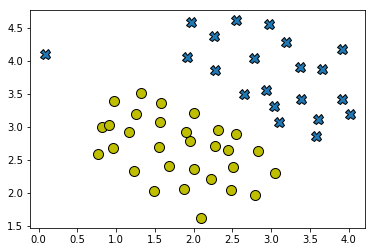

In [8]:
# Load from ex6data1
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('Data', 'ex6data1.mat'))
X, y = data['X'], data['y'][:, 0]

# Plot training data
plot_data(X, y)

**Try and plot with 5 different C. [15 pts]**

C value:  0.5


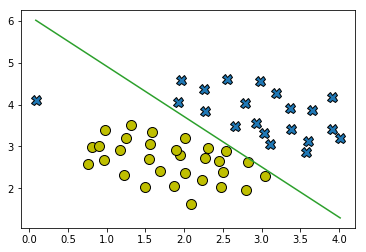

C value:  5


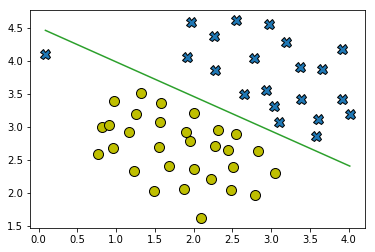

C value:  50


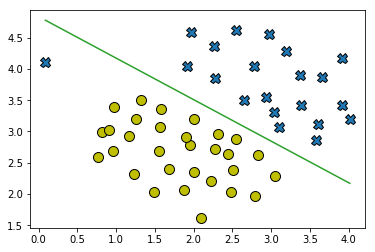

C value:  500


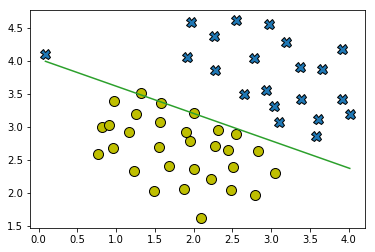

C value:  5000


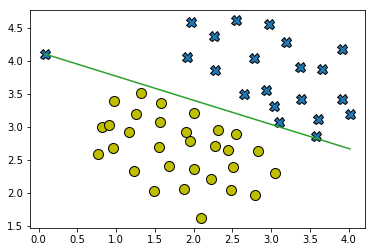

In [9]:
# Try 5 different C with LinearSVC.
from sklearn.svm import LinearSVC

################################################################################
# TODO:                                                                        #
# Pick 5 different C you like, train your LinearSVC with them, and plot all the#
# decision boundaries.                                                         #
# Note that you should train LinearSVC with l2 penalty and hinge loss.         #
# Also, note that when passing arguments to functions/class initializer, you   #
# can specify which value is for which argument.                               #
# This trick is called keyword arguments in Python.                            #
#                                                                              #
# For example, if I want to make a LinearSVC with C=0.5 and squared hinge loss,#
# we can write:                                                                #
# LinearSVC(C=0.5, loss='squared_hinge')                                       #
#                                                                              #
################################################################################
arrC = [0.5, 5, 50, 500, 5000]

for c in arrC:
    r = LinearSVC(C = c, loss = 'hinge', penalty = 'l2')
    r.fit(X,y)
    print('C value: ', c)
    plot_linear_boundary(X,y,r)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################



**Inline Question #1 [15 pts]:** Observing all the different decision boundaries, and answer the following two questions.
- What is the difference between using different $C$? Explain in two to three sentences.

**Ans** Theoretically we know that, small value of $C$ means that the Linear Support Vector Classifier will have large margin. On the other hand, large value of $C$ means the classifier will have small margin. Therefore, starting from small values of $C$, such as for $C=0.5$, the margin is relatively large compared to the margin when $C=5000$. 

- What is the role of outlier in these plots? Describe your thought in two to three sentences.

**Ans** The presense of outlier has an important role in these plot. As the dataset has outliers, with small value of $C$ the Linear Support Vector Classifier treats the outlier with little importance. However, as we increase the value of the $C$, the classifier tends to correct itself by compensating the margin. This makes the classifier to allow fewer outliers with small margin. 

Therefore, small $C =$ large margin and more room for outliers. 

And, large $C =$ small margin and fewer room for outliers. 

## Section 2. Kernel SVM [50 pts]


<a id="section1"></a>
In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable.

### 2.1 SVM with Gaussian kernel [30 pts]
In the lectures, we have talked about how to find non-linear decision boundaries by using similarity $f_i$ as features for SVMs. In this section, your goal is to implement a Gaussian kernel for measuring the distance between a pair of examples ($x$, $l^{(i)}$):
$$ f_{(i)}=\text{similarity}\left( x, l^{(i)} \right) = \exp \left( - \frac{\left\lvert\left\lvert x - l^{(i)} \right\lvert\right\lvert^2}{2\sigma^2} \right)$$
Where we pick $l^{(1)}=x^{(1)}$, $l^{(2)}=x^{(2)}$, $\cdots$, $l^{(m)}=x^{(m)}$, as mentioned in lecture slides. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.

Now, Complete the `gaussian_kernel` to compute the Gaussian kernel between two examples, ($x$, $l^{(i)}$).

<a id="gaussianKernel"></a>

In [14]:
def gaussian_kernel(x, l, sigma=2.0):
    """
    Computes the radial basis function
    Returns a radial basis function kernel between x and l.
    
    Parameters
    ----------
    x :  numpy ndarray
        A matrix of size (m, n), representing the dataset.
    
    l : numpy ndarray
        A matrix of size (k, n), representing the landmarks.
    
    sigma : float
        The bandwidth parameter for the Gaussian kernel.

    Returns
    -------
    f : numpy ndarray
        A matrix of size (m, k). Element f[i, j] represent the distance 
        between x[i] and l[j].
    
    Instructions
    ------------
    Fill in this function to return the similarity between `x` and `l`
    computed using a Gaussian kernel with bandwidth `sigma`.
    """
    f = np.zeros((x.shape[0], l.shape[0]))

    ################################################################################
    # TODO:                                                                        #
    # Implement your gaussian kernel.                                              #
    ################################################################################
    for i,x_i in enumerate(x):
        for j, l_j in enumerate(l):
            f[i,j] = np.exp((-1 * (np.linalg.norm(x_i - l_j))**2)/(2*sigma**2))

    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
    
    return f

Once you have completed the function `gaussian_kernel` the following cell will test your kernel function on two provided examples and you should expect to see a value of:

`[[1.         0.32465247]
 [0.32465247 1.        ]]`

In [15]:
x1 = np.array([[1, 2, 1], [0, 4, -1]])
x2 = np.array([[1, 2, 1], [0, 4, -1]])
sigma = 2

sim = gaussian_kernel(x1, x2, sigma)
print(sim)

[[1.         0.32465247]
 [0.32465247 1.        ]]


Now, let's test it on the non-linear dataset:

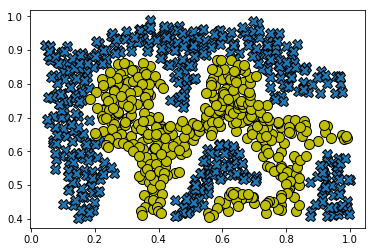

In [7]:
# Load from ex6data2
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('Data', 'ex6data2.mat'))
X, y = data['X'], data['y'][:, 0]

# Plot training data
plot_data(X, y)

Now, your task here is to train a SVM classifier with [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from `scikit-learn`.

While `SVC` has already implemented different kind of kernel functions, in this section, you need to use the `gaussian_kernel` that you just implemented, with `hinge_loss` and `l2` penalty.

**Hint:** check the class [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (click it!) the function `fit` and `predict`, as well as relevant descriptions about **Parameters/Attributes**.


You should get a decision boundary as shown in the figure below, as computed by the SVM with a Gaussian kernel. The decision boundary is able to separate most of the positive and negative examples correctly and follows the contours of the dataset well.

![Dataset 2 decision boundary](Figures/svm_dataset2.png)

<br/>
<div class="alert alert-block alert-warning">
**Implementation Note:** While `SVC` allows you to pass your customized kernel function, they did not provide a way for you to specify $\sigma$. Therefore, we have implemented a wrapper function called `kernel_wrapper` to help you circumvent this issue. The same thing can also be achieve by using functools.partial (See https://docs.python.org/2/library/functools.html#functools.partial).

</div>

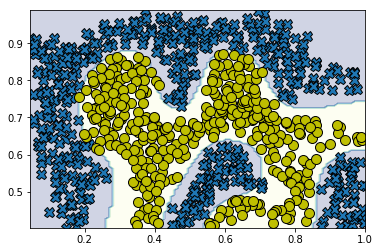

In [8]:
from functools import partial
from sklearn.svm import SVC


def kernel_wrapper(kernel_func, sigma=0.1):
    """
    Parameters
    ----------
    kernel_func :  function
        Your gaussian kernel.

    Returns
    -------
    f : function
        Your kernel function with your desired sigma.
    """
    def f(x, l):
        return kernel_func(x, l, sigma)
    return f


# sklearn does not let you pass sigma into your kernel function. 
# so to specify which sigma to use when computing the similarity,
# we use the kernel_wrapper to help "pack" the sigma into your kernel function.

sigma = 0.1 
kernel_function = kernel_wrapper(gaussian_kernel, sigma=sigma)

model = SVC(C=1.0, kernel=kernel_function, random_state=5566)
model.fit(X, y)
plot_nonlinear_boundary(X, y, model)

<a id="section2"></a>
### 2.2 Example Dataset 3 [20 pts]

In this part of the homework, you will gain more practical skills on how to use a SVM with a Gaussian kernel. The next cell will load and display a third dataset, which should look like the figure below.

![Dataset 3](Figures/dataset3.png)

You will be using the SVM with the Gaussian kernel with this dataset. In the provided dataset, `ex6data3.mat`, you are given the variables `X`, `y`, `X_val`, `y_val`. 

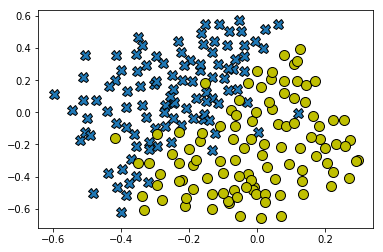

In [9]:
# Load from ex6data3
# You will have X, y, Xval, yval as keys in the dict data
data = loadmat(os.path.join('Data', 'ex6data3.mat'))

X_train = data['X']
y_train = data['y'][:, 0]
X_val = data['Xval']
y_val = data['yval'][:, 0]

# Plot training data
plot_data(X_train, y_train)

Your task is to use the cross validation set `Xval`, `yval` to determine the best $C$ and $\sigma$ parameter to use. You should write any additional code necessary to help you search over the parameters $C$ and $\sigma$. For both $C$ and $\sigma$, we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).
Note that you should try all possible pairs of values for $C$ and $\sigma$ (e.g., $C = 0.3$ and $\sigma = 0.1$). For example, if you try each of the 8 values listed above for $C$ and for $\sigma^2$, you would end up training and evaluating (on the cross validation set) a total of $8^2 = 64$ different models. After you have determined the best $C$ and $\sigma$ parameters to use, you should fill in the best parameters you found. For our best parameters, the SVM returned a decision boundary shown in the figure below. 

**Note that the best parameters may not be unique. You might get the same accuracy with a different decision boundary.**

![](Figures/svm_dataset3_best.png)

In [10]:
def evaluate_accuracy(y, y_pred):
    return np.mean(y == y_pred)

def search_hyperparam(X_train, y_train, X_val, y_val, Cs, sigmas):
    """
    Returns your choice of C and sigma for Part 3 of the exercise 
    where you select the optimal (C, sigma) learning parameters to use for SVM
    with RBF kernel.
    
    Parameters
    ----------
    X_tran : array_like
        (m x n) matrix of training data where m is number of training examples, and 
        n is the number of features.
    
    y_train : array_like
        (m, ) vector of labels for ther training data.
    
    X_val : array_like
        (mv x n) matrix of validation data where mv is the number of validation examples
        and n is the number of features
    
    y_val : array_like
        (mv, ) vector of labels for the validation data.
    Cs    : array_like
        list of C you wish to try.
    sigmas: array_like
        list of sigma you wish to try.
    
    Returns
    -------
    best_C, best_sigma, best_accuracy : float, float, float
        The best performing values for the regularization parameter C and 
        RBF parameter sigma.

    """
    
    best_accuracy = 0.0
    best_C = 0
    best_sigma = 0
    for C in Cs:
        for sigma in sigmas:
            kernel_function = kernel_wrapper(gaussian_kernel, sigma=sigma)
            ################################################################################
            # TODO:                                                                        #
            # Perform cross validation to find the best value of C and sigma.              #
            ################################################################################
            model = SVC(C=C, kernel=kernel_function, random_state=5566)
            model.fit(X_train, y_train)
            accuracy = model.score(X_val, y_val)
#             print("accuracy: ", accuracy)
            if best_accuracy < accuracy:
                best_accuracy = accuracy
                best_C = C
                best_sigma = sigma 
            ################################################################################
            #                                 END OF YOUR CODE                             #
            ################################################################################    
    return best_C, best_sigma, best_accuracy

The provided code in the next cell trains the SVM classifier using the training set $(X, y)$ using parameters loaded from `dataset3Params`. Note that this might take a few minutes to execute.

best_accuracy:  0.965
best_C:  1
best_sigma:  0.1
Final accuracy:  0.9478672985781991


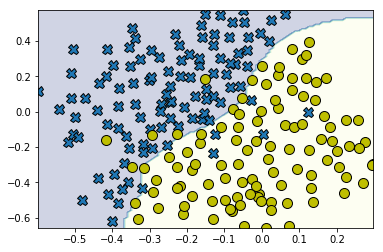

In [11]:
# Try different SVM Parameters here
################################################################################
# TODO:                                                                        #
# Implement search_hyperparam to search over different combinations of C and   #
# sigma and print out the best C, best sigma, and best accuracy.               #
# You should be able to get an accuracy higher than 0.9. Note that the best    #
# parameters are not unique.                                                   #
################################################################################
Cs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigmas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

best_C, best_sigma, best_accuracy = search_hyperparam(X_train, y_train, X_val, y_val, Cs, sigmas)

print("best_accuracy: ", best_accuracy)
print("best_C: ", best_C)
print("best_sigma: ", best_sigma)

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# Train the model again with your best parameters.
kernel_function = kernel_wrapper(gaussian_kernel, sigma=best_sigma)
model = SVC(C=best_C, kernel=kernel_function)
model.fit(X_train, y_train)
print("Final accuracy: ", model.score(X_train, y_train))
plot_nonlinear_boundary(X_train, y_train, model)

<a id="section3"></a>
## Section 3. Spam Classification [20 pts]

Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter.

You will be training a classifier to classify whether a given email, $x$, is spam ($y = 1$) or non-spam ($y = 0$). In particular, you need to convert each email into a feature vector $x \in \mathbb{R}^n$ . The following parts of the exercise will walk you through how such a feature vector can be constructed from an email.

The dataset included for this exercise is based on a a subset of the [SpamAssassin Public Corpus](http://spamassassin.apache.org/old/publiccorpus/). For the purpose of this exercise, you will only be using the body of the email (excluding the email headers).

### 3.1 Preprocessing Emails [10 pts]

Before starting on a machine learning task, it is usually insightful to take a look at examples from the dataset. The figure below shows a sample email that contains a URL, an email address (at the end), numbers, and dollar
amounts.

<img src="Figures/email.png" width="700px" />

While many emails would contain similar types of entities (e.g., numbers, other URLs, or other email addresses), the specific entities (e.g., the specific URL or specific dollar amount) will be different in almost every
email. Therefore, one method often employed in processing emails is to “normalize” these values, so that all URLs are treated the same, all numbers are treated the same, etc. For example, we could replace each URL in the
email with the unique string “httpaddr” to indicate that a URL was present.

This has the effect of letting the spam classifier make a classification decision based on whether any URL was present, rather than whether a specific URL was present. This typically improves the performance of a spam classifier, since spammers often randomize the URLs, and thus the odds of seeing any particular URL again in a new piece of spam is very small. 

In the function `process_email` below, we have implemented the following email preprocessing and normalization steps:

- **Lower-casing**: The entire email is converted into lower case, so that captialization is ignored (e.g., IndIcaTE is treated the same as Indicate).

- **Stripping HTML**: All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the HTML tags, so that only the content remains.

- **Normalizing URLs**: All URLs are replaced with the text “httpaddr”.

- **Normalizing Email Addresses**:  All email addresses are replaced with the text “emailaddr”.

- **Normalizing Numbers**: All numbers are replaced with the text “number”.

- **Normalizing Dollars**: All dollar signs ($) are replaced with the text “dollar”.

- **Word Stemming**: Words are reduced to their stemmed form. For example, “discount”, “discounts”, “discounted” and “discounting” are all replaced with “discount”. Sometimes, the Stemmer actually strips off additional characters from the end, so “include”, “includes”, “included”, and “including” are all replaced with “includ”.

- **Removal of non-words**: Non-words and punctuation have been removed. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.

The result of these preprocessing steps is shown in the figure below. 

<img src="Figures/email_cleaned.png" alt="email cleaned" style="width: 600px;"/>

While preprocessing has left word fragments and non-words, this form turns out to be much easier to work with for performing feature extraction.

#### 3.1.1 Vocabulary List

After preprocessing the emails, we have a list of words for each email. The next step is to choose which words we would like to use in our classifier and which we would want to leave out.

For this exercise, we have chosen only the most frequently occuring words as our set of words considered (the vocabulary list). Since words that occur rarely in the training set are only in a few emails, they might cause the
model to overfit our training set. The complete vocabulary list is in the file `vocab.txt` (inside the `Data` directory for this exercise) and also shown in the figure below.

<img src="Figures/vocab.png" alt="Vocab" width="150px" />

Our vocabulary list was selected by choosing all words which occur at least a 100 times in the spam corpus,
resulting in a list of 1899 words. In practice, a vocabulary list with about 10,000 to 50,000 words is often used.
Given the vocabulary list, we can now map each word in the preprocessed emails into a list of word indices that contains the index of the word in the vocabulary dictionary. The figure below shows the mapping for the sample email. Specifically, in the sample email, the word “anyone” was first normalized to “anyon” and then mapped onto the index 86 in the vocabulary list.

<img src="Figures/word_indices.png" alt="word indices" width="200px" />

Your task now is to complete the code in the function `processEmail` to perform this mapping. In the code, you are given a string `word` which is a single word from the processed email. You should look up the word in the vocabulary list `vocabList`. If the word exists in the list, you should add the index of the word into the `word_indices` variable. If the word does not exist, and is therefore not in the vocabulary, you can skip the word.

<div class="alert alert-block alert-warning">
**python tip**: In python, you can find the index of the first occurence of an item in `list` using the  `index` attribute. In the provided code for `processEmail`, `vocabList` is a python list containing the words in the vocabulary. To find the index of a word, we can use `vocabList.index(word)` which would return a number indicating the index of the word within the list. If the word does not exist in the list, a `ValueError` exception is raised. In python, we can use the `try/except` statement to catch exceptions which we do not want to stop the program from running. You can think of the `try/except` statement to be the same as an `if/else` statement, but it asks for forgiveness rather than permission.

An example would be:
<br>

```
try:
    do stuff here
except ValueError:
    pass
    # do nothing (forgive me) if a ValueError exception occured within the try statement
```
</div>
<a id="processEmail"></a>

In [3]:
def process_email(email_contents, verbose=True):
    """
    Preprocesses the body of an email and returns a list of indices 
    of the words contained in the email.    
    
    Parameters
    ----------
    email_contents : str
        A string containing one email. 
    
    verbose : bool
        If True, print the resulting email after processing.
    
    Returns
    -------
    word_indices : list
        A list of integers containing the index of each word in the 
        email which is also present in the vocabulary.
    
    Instructions
    ------------
    Fill in this function to add the index of word to word_indices 
    if it is in the vocabulary. At this point of the code, you have 
    a stemmed word from the email in the variable word.
    You should look up word in the vocabulary list (vocabList). 
    If a match exists, you should add the index of the word to the word_indices
    list. Concretely, if word = 'action', then you should
    look up the vocabulary list to find where in vocabList
    'action' appears. For example, if vocabList[18] =
    'action', then, you should add 18 to the word_indices 
    vector (e.g., word_indices.append(18)).
    
    Notes
    -----
    - vocabList[idx] returns a the word with index idx in the vocabulary list.
    
    - vocabList.index(word) return index of word `word` in the vocabulary list.
      (A ValueError exception is raised if the word does not exist.)
    """
    # Load Vocabulary
    vocabList = utils.getVocabList()
    
#     print("Vocab: ", vocabList)

    # Init return value
    word_indices = []

    # ========================== Preprocess Email ===========================
    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers
    # hdrstart = email_contents.find(chr(10) + chr(10))
    # email_contents = email_contents[hdrstart:]

    # Lower case
    email_contents = email_contents.lower()
    
    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    email_contents =re.compile('<[^<>]+>').sub(' ', email_contents)

    # Handle Numbers
    # Look for one or more characters between 0-9
    email_contents = re.compile('[0-9]+').sub(' number ', email_contents)

    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.compile('(http|https)://[^\s]*').sub(' httpaddr ', email_contents)

    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.compile('[^\s]+@[^\s]+').sub(' emailaddr ', email_contents)
    
    # Handle $ sign
    email_contents = re.compile('[$]+').sub(' dollar ', email_contents)
    
    # get rid of any punctuation
    email_contents = re.split('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\n\r]', email_contents)

    # remove any empty word string
    email_contents = [word for word in email_contents if len(word) > 0]
    
    # Stem the email contents word by word
    stemmer = utils.PorterStemmer()
    processed_email = []
    
    for word in email_contents:
        # Remove any remaining non alphanumeric characters in word
        word = re.compile('[^a-zA-Z0-9]').sub('', word).strip()
        word = stemmer.stem(word)
        processed_email.append(word)

        if len(word) < 1:
            continue
        ################################################################################
        # TODO:                                                                        #
        # Look up the word in the dictionary and add to word_indices if found.         # 
        ################################################################################
        if word in vocabList:
            indx = vocabList.index(word)
            word_indices.append(indx)
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
    if verbose:
        print('----------------')
        print('Processed email:')
        print('----------------')
        print(' '.join(processed_email))
    return word_indices

Once you have implemented `processEmail`, the following cell will run your code on the email sample and you should see an output of the processed email and the indices list mapping.

In [4]:
#  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
#  to convert each email into a vector of features. In this part, you will
#  implement the preprocessing steps for each email. You should
#  complete the code in processEmail.m to produce a word indices vector
#  for a given email.

# Extract Features
with open(os.path.join('Data', 'emailSample1.txt')) as fid:
    file_contents = fid.read()

word_indices  = process_email(file_contents)

#Print Stats
print('-------------')
print('Word Indices:')
print('-------------')
print(word_indices)

----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr
-------------
Word Indices:
-------------
[85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1894, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 476, 1119, 1892, 1509, 798, 1181, 1236, 511, 1119, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530]


<a id="section4"></a>
### 3.2 Extracting Features from Emails [10 pts]

You will now implement the feature extraction that converts each email into a vector in $\mathbb{R}^n$. For this exercise, you will be using n = # words in vocabulary list. Specifically, the feature $x_i \in \{0, 1\}$ for an email corresponds to whether the $i^{th}$ word in the dictionary occurs in the email. That is, $x_i = 1$ if the $i^{th}$ word is in the email and $x_i = 0$ if the $i^{th}$ word is not present in the email.

Thus, for a typical email, this feature would look like:

$$ x = \begin{bmatrix} 
0 & \dots & 1 & 0 & \dots & 1 & 0 & \dots & 0 
\end{bmatrix}^T \in \mathbb{R}^n
$$

You should now complete the code in the function `email_features` to generate a feature vector for an email, given the `word_indices`.
<a id="emailFeatures"></a>

In [5]:
def email_features(word_indices):
    """
    Takes in a word_indices vector and produces a feature vector from the word indices. 
    
    Parameters
    ----------
    word_indices : list
        A list of word indices from the vocabulary list.
    
    Returns
    -------
    x : list 
        The computed feature vector.
    
    Instructions
    ------------
    Fill in this function to return a feature vector for the
    given email (word_indices). To help make it easier to  process 
    the emails, we have have already pre-processed each email and converted
    each word in the email into an index in a fixed dictionary (of 1899 words).
    The variable `word_indices` contains the list of indices of the words 
    which occur in one email.
    
    Concretely, if an email has the text:

        The quick brown fox jumped over the lazy dog.

    Then, the word_indices vector for this text might look  like:
               
        60  100   33   44   10     53  60  58   5

    where, we have mapped each word onto a number, for example:

        the   -- 60
        quick -- 100
        ...

    Note
    ----
    The above numbers are just an example and are not the actual mappings.

    Your task is take one such `word_indices` vector and construct
    a binary feature vector that indicates whether a particular
    word occurs in the email. That is, x[i] = 1 when word i
    is present in the email. Concretely, if the word 'the' (say,
    index 60) appears in the email, then x[60] = 1. The feature
    vector should look like:
        x = [ 0 0 0 0 1 0 0 0 ... 0 0 0 0 1 ... 0 0 0 1 0 ..]
    """
    # Total number of words in the dictionary
    n = 1899

    # You need to return the following variables correctly.
    x = np.zeros(n)

    ################################################################################
    # TODO:                                                                        #
    # Set the corresponding word indices to 1.                                     #
    ################################################################################
    x[word_indices] = 1
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################    
    return x

Once you have implemented `emailFeatures`, the next cell will run your code on the email sample. You should see that the feature vector had length 1899 and 45 non-zero entries.

In [15]:
# Extract Features
with open(os.path.join('Data', 'emailSample1.txt')) as fid:
    file_contents = fid.read()

word_indices  = process_email(file_contents)
features      = email_features(word_indices)

# Print Stats
print('\nLength of feature vector: %d' % len(features))
print('Number of non-zero entries: %d' % sum(features > 0))

----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr

Length of feature vector: 1899
Number of non-zero entries: 45


### 3.3 Training SVM for Spam Classification

In the following section we will load a preprocessed training dataset that will be used to train a SVM classifier. The file `spamTrain.mat` (within the `Data` folder for this exercise) contains 4000 training examples of spam and non-spam email, while `spamTest.mat` contains 1000 test examples. Each
original email was processed using the `process_email` and `email_features` functions and converted into a vector $x^{(i)} \in \mathbb{R}^{1899}$.

After loading the dataset, the next cell proceed to train a `LinearSVC` to classify between spam ($y = 1$) and non-spam ($y = 0$) emails. Once the training completes, you should see that the classifier gets a training accuracy of about 99.8% and a test accuracy of about 98.5%.

In [10]:
# Load the Spam Email dataset
# You will have X, y in your environment
data = loadmat(os.path.join('Data', 'spamTrain.mat'))
X, y= data['X'].astype(float), data['y'][:, 0]

print('Training Linear SVM (Spam Classification)')

C = 0.1
model = LinearSVC(C=C, penalty='l2', loss='hinge', random_state=5566)
model.fit(X, y)
g = model.predict(X)
print('Test Accuracy: %.2f' % (np.mean(g == y) * 100))

Training Linear SVM (Spam Classification)
Test Accuracy: 99.85


In [11]:
# Load the test dataset
# You will have Xtest, ytest in your environment
data = loadmat(os.path.join('Data', 'spamTest.mat'))
Xtest, ytest = data['Xtest'].astype(float), data['ytest'][:, 0]

print('Evaluating the trained Linear SVM on a test set ...')
p = model.predict(Xtest)

print('Test Accuracy: %.2f' % (np.mean(p == ytest) * 100))

Evaluating the trained Linear SVM on a test set ...
Test Accuracy: 98.90


### 3.4 Top Predictors for Spam

To better understand how the spam classifier works, we can inspect the parameters to see which words the classifier thinks are the most predictive of spam. The next cell finds the parameters with the largest positive values in the classifier and displays the corresponding words similar to the ones shown in the figure below.

<div style="border-style: solid; border-width: 1px; margin: 10px 10px 10px 10px; padding: 10px 10px 10px 10px">
our  click  remov guarante visit basenumb dollar pleas price will nbsp most lo ga hour
</div>

Thus, if an email contains words such as “guarantee”, “remove”, “dollar”, and “price” (the top predictors shown in the figure), it is likely to be classified as spam.

Since the model we are training is a linear SVM, we can inspect the weights learned by the model to understand better how it is determining whether an email is spam or not. The following code finds the words with the highest weights in the classifier. Informally, the classifier 'thinks' that these words are the most likely indicators of spam.

In [18]:
# Sort the weights and obtin the vocabulary list
# NOTE some words have the same weights, 
# so their order might be different than in the text above
weights = model.coef_[0]

idx = np.argsort(weights)
top_idx = idx[-15:][::-1]
vocabList = utils.getVocabList()

print('Top predictors of spam:')
print('%-15s %-15s' % ('word', 'weight'))
print('----' + ' '*12 + '------')
for word, w in zip(np.array(vocabList)[top_idx], weights[top_idx]):
    print('%-15s %0.2f' % (word, w))


Top predictors of spam:
word            weight         
----            ------
our             0.50
click           0.47
remov           0.42
guarante        0.38
visit           0.37
basenumb        0.36
dollar          0.33
will            0.27
price           0.27
pleas           0.27
lo              0.26
nbsp            0.26
most            0.25
ga              0.25
hour            0.25


### 3.5 Try your own emails (Optional)

Now that you have trained a spam classifier, you can start trying it out on your own emails. In the starter code, we have included two email examples (`emailSample1.txt` and `emailSample2.txt`) and two spam examples (`spamSample1.txt` and `spamSample2.txt`). The next cell runs the spam classifier over the first spam example and classifies it using the learned SVM. You should now try the other examples we have provided and see if the classifier gets them right. You can also try your own emails by replacing the examples (plain text files) with your own emails.


In [20]:
filename = os.path.join('Data', 'customSpamSample.txt') # Custom Spam Sample (detected as a spam email)

with open(filename) as fid:
    file_contents = fid.read()

word_indices = process_email(file_contents, verbose=False)
x = email_features(word_indices)
print(x.shape)
p = model.predict(x.reshape(1, -1))

print('\nProcessed %s\nSpam Classification: %s' % (filename, 'spam' if p else 'not spam'))

(1899,)

Processed Data/customSpamSample.txt
Spam Classification: spam
